In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("data/train.csv")
data = data.drop("InvoiceNo", axis = 1)

data.loc[:, "InvoiceDate"] = pd.to_datetime(data.loc[:, "InvoiceDate"])

In [3]:
data = data.assign(
    transaction_date=data.InvoiceDate.dt.date,
    transaction_month=data.InvoiceDate.dt.month,
    transaction_day=data.InvoiceDate.dt.day,
    day_hour=data.InvoiceDate.dt.hour,
    total_price=data.Quantity * data.UnitPrice
)

data.head(2)

,CustomerID,Quantity,InvoiceDate,UnitPrice,Country,StockCode,transaction_date,transaction_month,transaction_day,day_hour,total_price
0,27270,7,2010-01-12 08:26:00,2.55,PX,85123AY,2010-01-12,1,12,8,17.85
1,27270,7,2010-01-12 08:26:00,3.39,PX,71053R,2010-01-12,1,12,8,23.73


## Basic Statistics

In [4]:
num_products = data.StockCode.nunique()
num_users = data.CustomerID.nunique()
total_sales = data.total_price.sum() / 1e6
avg_sales_user = total_sales / num_users
total_returns = data.loc[data.total_price < 0, "total_price"].sum() / 1e6

print('Number of Products: ', num_products)
print('Number of Users: ', num_users)

print('Total Sales ($ Millions): $%.2f'%(total_sales))
print('Average Sales per User : $%.1f'%(avg_sales_user*1e6))
print('Total Returns ($ Millions) $%.3f'%(-total_returns))

Number of Products:  3810
Number of Users:  972
Total Sales ($ Millions): $7.12
Average Sales per User : $7324.5
Total Returns ($ Millions) $0.139


## Distribution of sales

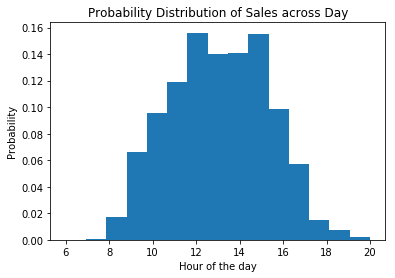

In [259]:
plt.hist(data['day_hour'], bins=15, density=True)
plt.xlabel('Hour of the day')
plt.ylabel('Probability')
plt.title('Probability Distribution of Sales across Day')
plt.show()

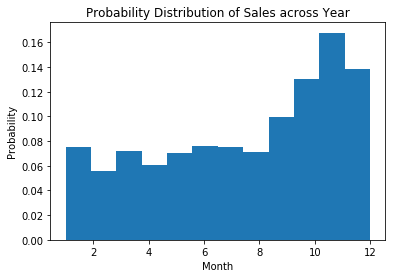

In [260]:
# Distribution of sales over One Year

plt.hist(data['Month'], bins=len(np.unique(data['Month'])), density=True)
plt.xlabel('Month')
plt.ylabel('Probability')
plt.title('Probability Distribution of Sales across Year')
plt.show()

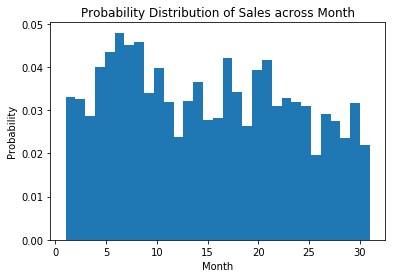

In [261]:
# Distribution of sales over One Month

plt.hist(data['Day'], bins=len(np.unique(data['Day'])), density=True)
plt.xlabel('Month')
plt.ylabel('Probability')
plt.title('Probability Distribution of Sales across Month')
plt.show()

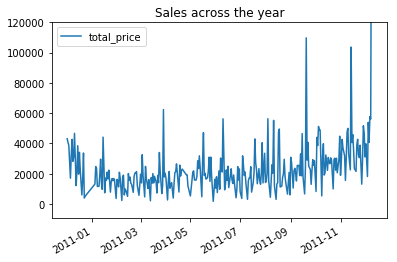

In [263]:
ts_day_sales = data.groupby('Date').agg({'total_price': 'sum'})
ts_day_sales['full_date'] = ts_day_sales.index
ts_day_sales['full_date'] = pd.to_datetime(ts_day_sales['full_date'], format='%d-%m-%Y')
ts_day_sales.index = ts_day_sales['full_date'].values

ts_day_sales = ts_day_sales.sort_index()
ts_day_sales.drop('full_date', axis = 1).plot()
plt.title('Sales across the year')
plt.ylim(top = 120000)
plt.show()

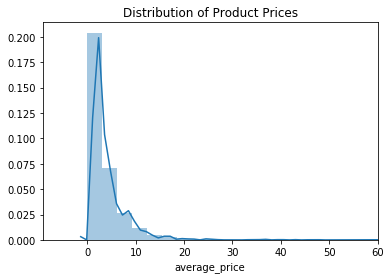

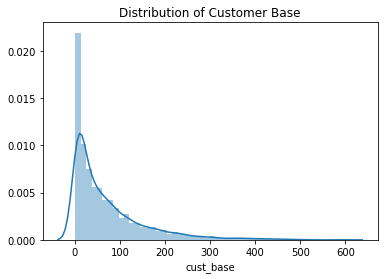

In [281]:
prod_eda = pd.DataFrame()

prod_eda['prod_id'] = np.unique(data.StockCode)
prod_eda.index = prod_eda['prod_id']

prod_eda['average_price'] = data.groupby('StockCode').agg({'UnitPrice':'mean'})
sns.distplot(prod_eda['average_price'])
plt.xlim(right = 60)
plt.title('Distribution of Product Prices')
plt.show()

prod_eda['quantity_sold'] = data.groupby('StockCode').agg({'Quantity':'sum'})

prod_eda['cust_base'] = data.groupby('StockCode').agg({'CustomerID':pd.Series.nunique})
sns.distplot(prod_eda['cust_base'])
plt.title('Distribution of Customer Base')
plt.show()

In [276]:
prod_eda.head()

,prod_id,average_price,quantity_sold,cust_base
prod_id,,,,
10002F,10002F,1.060000,562,41
10080Q,10080Q,0.367059,291,17
10120M,10120M,0.210000,172,20
10123CU,10123CU,0.650000,5,3
10124AW,10124AW,0.420000,11,3
